# Mathematik für Biologiestudierende II

Sommersemester 2025

08.07.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Themen

* Elektrophorese als Beispiel für Regression im exponentiellen Modell
* logistische Regression
* graphische logistische Regression

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()
import statsmodels.formula.api as smf

# Regression im exponentiellen Modell

## Beispiel Elektrophorese

### Elektrophoreseapparatur

![Elektrophoreseapparatur](bilder/elektrophorese2.png)

&copy; Prof. Dr. Schmitt-Wrede, HHU Düsseldorf

### Proteinanalyse durch Elektrophorese

* Die Molekülmasse eines Proteins wird bestimmt, indem man seinen Laufweg in einem Gel misst, an welches eine Spannung angelegt wird.
* Dazu muss das Protein zuerst aufbereitet werden; dieser Aspekt ist Thema von Biologie 110.
* Das aufbereitete Protein wird zusammen mit sechs Referenzproteinen bekannter Massenzahl und einem Farbstoff in der Elektrophoreseapparatur einer Spannungsdifferenz ausgesetzt.  Die Spannung wird abgeschaltet, sobald der Farbstoff die Apparatur durchlaufen hat.

### Laufwege

![Laufwege im Gel](bilder/elektrophorese1.png)

&copy; Prof. Dr. Schmitt-Wrede, HHU Düsseldorf

* Die linke Spur zeigt zuunterst die Lauffront des Farbmarkers und darüber die Lauffronten der Referenzproteine.
* Die Zahlen bedeuten jeweils die Molekülmassen der Referenzproteine in Dalton sowie ihren relativen Laufweg.
* Die rechte Spur stammt von einem bakteriellen Proteinextrakt.  Bestimmt werden soll die Molekülmasse des mit * gekennzeichnete Bestandteils.

* Ein Dalton ist das Gewicht eines Nukleons. 
* Der Laufweg ist so normiert, dass der Laufweg des Farbmarkers die Länge 1 hat.  Der kürzeste Laufweg ist oben.
* Es besteht eine lineare Beziehung zwischen dem *Logarithmus* der Molekülmasse und der Laufstrecke des Proteins.
* Zum Eichen werden die Referenzpunkte auf halblogarithmisches Papier aufgetragen.

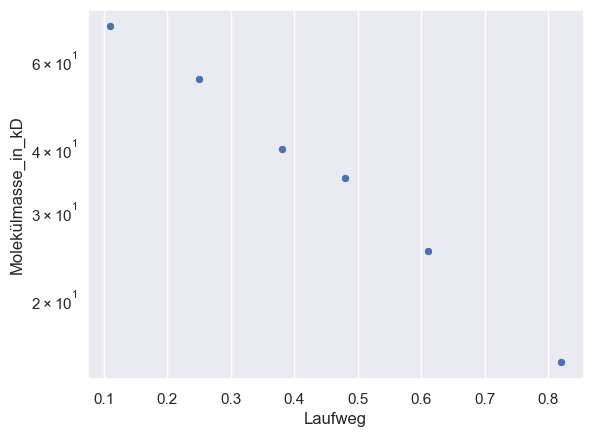

In [2]:
df = pd.DataFrame()
df['Laufweg'] = [0.11, .25, .38, .48, .61, .82]
df['Molekülmasse_in_kD'] = [70., 55, 40, 35, 25, 15]
ax = sns.scatterplot(df, x='Laufweg', y='Molekülmasse_in_kD')
ax.set_yscale('log')


* Wir bestimmen die Eichkurve durch Regression im exponentiellen Modell
* Dies geschieht zeichnerisch, indem man auf halblogarithmischem Papier die beste Gerade nach Augenschein bestimmt
* oder rechnerisch, indem man die lineare Regressionsgerade zu den Logarithmen der Molekülmassen berechnet. Welchen Logarithmus man hier wählt, ist unerheblich
* Halblogarithmisches Papier verwendet den Zehnerlogarithmus, daher machen wir das hier auch

In [3]:
df['lg'] = np.log10(df.Molekülmasse_in_kD)
formel = 'lg ~ Laufweg'
modell = smf.ols(formel, df)
res = modell.fit()

In [4]:
res.summary()

C:\Users\rb\git\mfb2425\.pixi\envs\default\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     lg   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     680.9
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           1.28e-05
Time:                        09:51:01   Log-Likelihood:                 16.015
No. Observations:                   6   AIC:                            -28.03
Df Residuals:                       4   BIC:                            -28.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9672      0.018    109.160      0.000       1.917       2.017
Laufweg       -0.9424      0.036    -26.095      0.000      -1.043      -0.842
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.035
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.447
Skew:                           0.466   Prob(JB):                        0.800
Kurtosis:                       2.041   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
m = -0.9424
b = 1.9672

Die so bestimmte Regressionskurve ist 
$$
                y = 10^{-0.942 \cdot x + 1.97}
$$

In [7]:
x = np.linspace(0.1, 0.82, 50)
regrKurve = 10**(m*x + b)

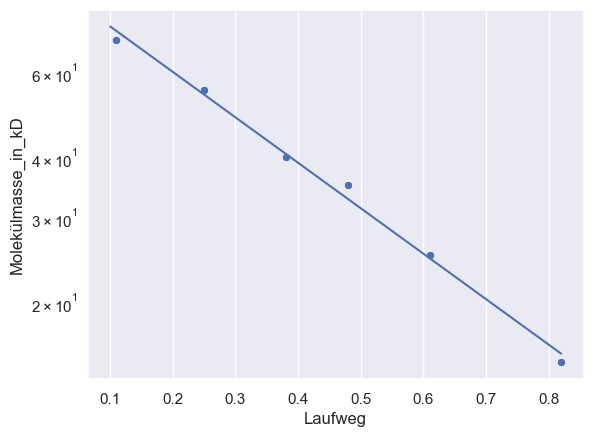

In [8]:
sns.lineplot(x=x, y=regrKurve, ax=ax)
ax.figure

* Bisher haben wir nur unsere Apperatur geeicht.  Jetzt malen wir noch den Punkt hinein.
* Der beobachtete Laufweg beträgt 0.42

In [9]:
lweg = 0.42
masse = 10**(m*lweg+b)
masse    # Masse in kD

37.27279837239035

Das unbekannte Protein hat eine Molekularmasse von 37300 Dalton.

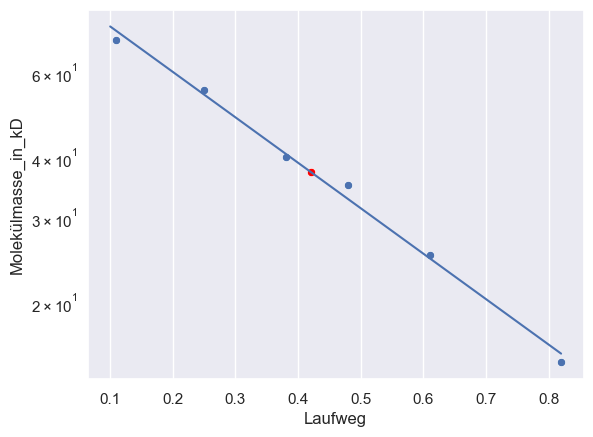

In [10]:
sns.scatterplot(x=[lweg], y=[masse], ax=ax, color='red')
ax.figure

# Logistische Regression

* Wenn die abhängige Variable nur die Werte 0 und 1 annehmen kann, kann eine logistische Regression durchgeführt werden

In [11]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
formula = "survived ~ sex + age + embark_town + C(pclass)"

* `pclass` wird durch eine Zahl angegeben
* `C(pclass)` bedeutet, dass diese Variable trotzdem kategoriell verstanden werden soll


In [14]:
modell = smf.logit(formula, df)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.451318
         Iterations 6


* Im Gegensatz zu `smf.ols` ist `smf.logit` nichtlinear
* Im Hintergrung läuft ein nichtlineares Optimierungsprogramm ab
* Wir sehen die Statusmeldung des Optimierungsprogramms

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Tue, 08 Jul 2025   Pseudo R-squ.:                  0.3312
Time:                        09:54:31   Log-Likelihood:                -321.34
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.013e-65
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.0368      0.431      9.371      0.000       3.193       4.881
sex[T.male]                   -2.5158      0.209    -12.020      0.000      -2.926      -2.106
embark_town[T.Queenstown]     -0.8142      0.568     -1.434      0.152      -1.927       0.299
embark_town[T.Southampton]    -0.4937      0.267     -1.850      0.064      -1.017       0.029
C(pclass)[T.2]                -1.1446      0.291     -3.938      0.000      -1.714      -0.575
C(pclass)[T.3]                -2.4096      0.291     -8.275      0.000      -2.980      -1.839
age                           -0.0361      0.008     -4.677      0.000      -0.051      -0.021
==============================================================================================
"""

In [16]:
anfrage = pd.DataFrame()
anfrage['sex'] = ['male', 'male', 'female']
anfrage['embark_town'] = ['Southampton', 'Southampton', 'Southampton']
anfrage['age'] = [35, 45, 45]
anfrage['pclass'] = [1,2,3]
anfrage

,sex,embark_town,age,pclass
0,male,Southampton,35,1
1,male,Southampton,45,2
2,female,Southampton,45,3


In [17]:
res.get_prediction(anfrage).summary_frame()

,predicted,se,ci_lower,ci_upper
0,0.441399,0.054207,0.339307,0.548697
1,0.149196,0.030443,0.098769,0.219110
2,0.379875,0.059188,0.272391,0.500592


### Beispiel Klausurergebnis und Übungspunkte

* Die Zielvariable ist ein Klausurergebnis: bestanden ja (=1) und nein (=0)
* Die Zielvariable ist kategoriell
* muss aber als 0 und 1 kodiert sein
* Erklärende Variablen können quantitativ oder kategoriell sein

* im Beispiel:  In die Klausur eingebrachte Übungspunkte `ksp`
* quantitativ von 0 bis 6

In [18]:
df = pd.read_csv('bsp_logit.csv')
df.head()

,bestanden,ksp
0,1,6.0
1,1,6.0
2,1,6.0
3,1,6.0
4,0,5.0


In [19]:
formel = "bestanden ~ ksp"
modell = smf.logit(formel, df)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.561591
         Iterations 5


In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bestanden   No. Observations:                  138
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Jul 2025   Pseudo R-squ.:                 0.08611
Time:                        10:01:41   Log-Likelihood:                -77.500
converged:                       True   LL-Null:                       -84.801
Covariance Type:            nonrobust   LLR p-value:                 0.0001327
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3669      0.646     -2.116      0.034      -2.633      -0.101
ksp            0.4331      0.121      3.572      0.000       0.195       0.671
==============================================================================
"""

* Der Einfluss der Übungspunkte auf das Klausurergebnis ist hochsignifikant

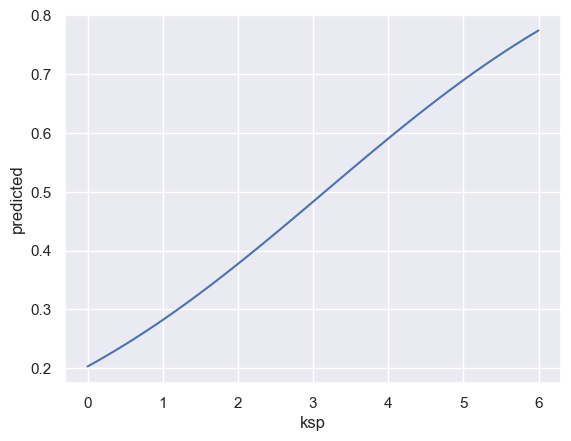

In [23]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(0, 6, 50)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

Wir sehen nur einen kleinen Ausschnitt aus der logistischen Kurve.  Wir ergänzen den Datenbereich der erklärenden Daten um unsinnige Werte, um die Gestalt der logistische Kurve zu zeigen

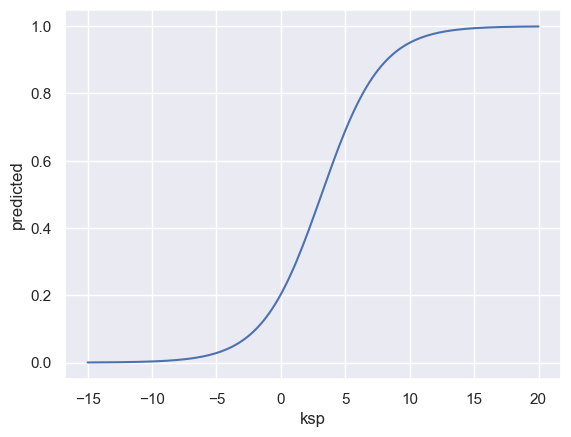

In [24]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(-15, 20, 150)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

* Die logistische Kurve ist 
$$
    y = \frac1{1+e^{-b - m \cdot x}}
$$
* Logistische Regression findet die optimale Annäherung an die Datenpunkte durch eine logistische Kurve

jitter: Verwackeln der Datenpunkte, damit sich mehrere Punkte beim scatterplot nicht gegenseitig verdecken

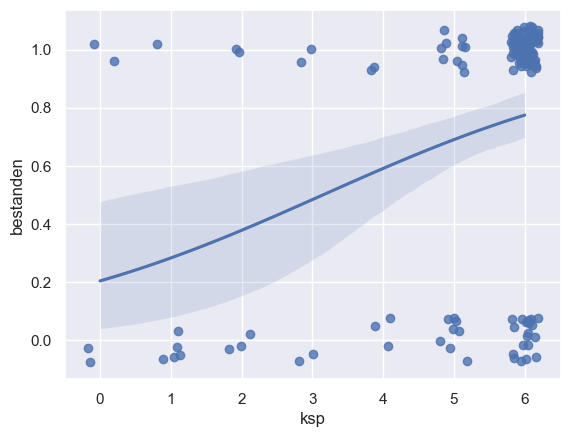

In [27]:
sns.regplot(df, x='ksp', y='bestanden', logistic=True, y_jitter=0.08, x_jitter=0.2);

# Nächste Woche Probeklausur

* am Sonntag Abend werden auf https://www.math.uni-duesseldorf.de/~internet/bio2425 Aufgaben veröffentlicht
* lösen Sie diese zuhause
* am 15.07.2025 bespreche ich die Lösungen
* bereiten Sie sich darauf vor, Fragen zu stellen
* ob Sie jetzt schon alles gekonnt hätten, ist zu diesem Zeitpunkt nicht so wichtig